# A2. Models of complex networks

### Implementation of models of complex networks.
Implement generators of complex networks for, at least, two of the following models of complex networks (sorted by increasing difficulty), which must include at least one of the two last ones (BA or CM):

- Erdös-Rényi (ER) networks, either G(N,K) or G(N,p)

- Watts-Strogatz (WS) small-world model

- Barabási & Albert (BA) preferential attachment model

- Configuration Model (CM)

In [ ]:
#Libraries
import matplotlib.pyplot as plt
import numpy as np 
import networkx as nx
import math

In [ ]:
## PArams
from pylab import rcParams
rcParams['figure.figsize'] = 12,8

## 1. Erdös-Rényi (ER) networks, either G(N,K) or G(N,p)
ER: different values of "K" for G(N,K), or of "p" for G(N,p), such that e.g. k=3, 6, 10

### Defining the object

In [ ]:
## make a class for a Erdos-Renyi graph 
class ErdosRenyi:
    """
    PARAMS: 
    -------
    number_of_nodes : the total number of nodes in the graph 
    
    degrees : degrees (k), maximum degree per node 
    
    probabilities : the probability that will be assigned to each new node 
    
    RETRUNS:
    --------
    
    ER_graph : A randomly generated Erdös-Rényi Graph with the defined parameters above. 
    """
    def __init__(self, n_nodes:int, degrees:int, probabilities:float, k:int=3) -> dict:
        self.nodes = n_nodes
        self.degrees = degrees
        self.proba = probabilities
        self.k = k
        self.graph  = self._generate_graph(nx.Graph(),self.nodes, self.proba)
        self.theoretical_values = round(self.proba * (self.nodes - 1),2)
        self.experimental_values = round((2.0 * len(self.graph.edges())) / self.nodes,2)
        self.deg_hist = self._get_degree_histogram(self.graph)
        self.exp_vals = self.deg_hist / sum(self.deg_hist) ## normalizing the histogram
        self.dir_to_save = "./imgs/ER/plots/" ## directory to save 
        
    ## define the generate_ER_graph function
    @staticmethod
    def _generate_graph(g, nodes:int, proba:float):
        ## instantiate an empty graph 
        #g = nx.Graph()
        ## add nodes to the graph
        g.add_nodes_from(range(nodes))
        ## iterate over the nodes and
        for node in range(0, nodes):
            ## generate the random value 
            rand_val = np.random.uniform(0,1)
            ## iterate over a possible link
            for edge in range(node+1, nodes):
                ## if a random value is less than the probability, add the link
                if rand_val < proba or proba == 1:
                    ## check the number of edges between the two nodes
                    g.add_edge(node, edge)
                else:
                    continue
        ## assign the graph to the class
        return g
    
        ## define function to get the degree histogram
    @staticmethod
    def _get_degree_histogram(graph):
        ## calculate the degree history 
        return np.array(nx.degree_histogram(graph))

    @staticmethod
    def _theoretical_distribution(theoretical_values, degree_history):
        return [math.exp(-theoretical_values) \
                                                    *theoretical_values**val/math.factorial(val) \
                                                    for val in range(len(degree_history))
                                                    ]

    
    ## plot the network 
    def _plot_graph(self, axis=None):
        """plots only the graph"""
        if self.graph:
            #layout = nx.spring_layout(self.graph)
            nx.draw(self.graph,ax=axis)
            plt.title(f'Erdos-Renyi Graph with N = {self.nodes} and p = {self.proba}')
            plt.show()
    
    def _plot_distribution(self):
        if self.graph:
            ## plotting the Experimental values 
            plt.plot(self.exp_vals, label='Experimental Degree Distribution', marker='o',linestyle='dashdot', color='red') ## plot the experimental values
            plt.axvline(self.experimental_values, color='red', linestyle='--', label=f"Experimental values = {self.experimental_values}") ## plot the vertical line
            ## plotting the Theoretical values
            plt.plot(self._theoretical_distribution(self.theoretical_values, self.deg_hist), color='blue',marker='+',linestyle='dashed', label="Theoretical Degree Distribution") ## plot the theoretical values')
            plt.axvline(self.theoretical_values, color='blue', linestyle='--', label=f"Theoretical values = {self.theoretical_values}") ## plot the vertical line
            plt.title('Degree Distribution')
            plt.legend()
            plt.xlabel("Degrees")
            plt.ylabel("Probability of Degree [P(k)]")
            plt.show()
            
    
    def _plot_combined(self):
        ## plot the network & the corresponding statistics
        fig, axs = plt.subplots(nrows=2, ncols=1, figsize=(20,10))
        ## title
        nx.draw(self.graph, ax=axs[0])
        fig.suptitle(f'Erdos-Renyi Graph with N = {self.nodes} and p = {self.proba}')
        axs[1].plot(self.exp_vals, label='Experimental Degree Distribution', marker='o',linestyle='dashdot', color='red') ## plot the experimental values
        axs[1].axvline(self.experimental_values, color='red', linestyle='--', label=f"Experimental values = {self.experimental_values}") ## plot the vertical line
        ## plotting the Theoretical values
        axs[1].plot(self._theoretical_distribution(self.theoretical_values, self.deg_hist), color='blue',marker='+',linestyle='dashed', label="Theoretical Degree Distribution") ## plot the theoretical values')
        axs[1].axvline(self.theoretical_values, color='blue', linestyle='--', label=f"Theoretical values = {self.theoretical_values}") ## plot the vertical line
        axs[1].set_title('Degree Distribution')
        plt.legend()
        axs[1].set_xlabel("Degrees")
        axs[1].set_ylabel("Probability of Degree [P(k)]")
        #plt.savefig(self.dir_to_save + f"ER_Theoretical_Actual_Distribution.png")
        plt.tight_layout()
        plt.show()

### Instantiating the Graph

In [ ]:
g = ErdosRenyi(n_nodes=50, degrees=3, probabilities=0.15, k=3)

In [ ]:
## view the network
g._plot_graph()

In [ ]:
## look at the distribution 
g._plot_distribution()

In [ ]:
## plot both 
g._plot_combined()

### Prepare Delivery files

In [ ]:
## generate the plots and the matrix files to deliver 
nodes = 100
proba = 0.2
k = 3 ## fix this 
for node in [50, 100, 1000, 10000]:
    for probs in [0.1, 0.25, 0.5, 0.75, 0.9]:
        ## build it 
        g = ErdosRenyi(node, k, probs).generate_ER_graph()
        #nx.draw(g, with_labels=True)
        degs = dict(nx.degree(g))
        #_ = [print(f"Node: {i} has degree: {k}") for i,k in degs.items()]
        nx.draw(g, pos=nx.spring_layout(g))
        plt.title(f"Erdos-Renyi Graph with {node} nodes (k={k},p={probs})")
        #plt.hist(degs.values(), bins=range(0, max(degs.values())+1));plt.show()
        plt.savefig(f"./graph_imgs/ER_graph_{node}_{k}_{round(probs*100)}.png")
        plt.show()
        output = nx.to_numpy_matrix(g)
        np.save(f"./graphs/ER/{node}/ER_graph_{node}_{k}_{round(probs*100)}.npy", output)
        

## 2. Barabási & Albert (BA) preferential attachment model
BA: different values of "m" (number of edges that each new nodes forms with the existing nodes), e.g. m=1, 2, 5

In [ ]:
## imports 
import numpy as np 
import networkx as nx
import matplotlib.pyplot as plt
from numba import jit

### Defining the BA Model

In [250]:
@jit(nopython=True,parallel=True,nogil=True)
def get_degree_matrix(adjacency_matrix:np.matrix) -> np.matrix:
    """Returns degree matrix from adjacency matrix"""
    ## create an empty matrix to return the values 
    empty_like = np.zeros_like(adjacency_matrix)
    tmp = np.triu(adjacency_matrix.copy())
    ## calculate the rowsum 
    rowsum = np.sum(tmp, axis=0)
    ## calculate the colsum & transpose 
    colsum = np.sum(tmp, axis=1).T
    ## sum them 
    degrees = rowsum + colsum 
    ## fill the empty matrix 
    np.fill_diagonal(empty_like, degrees)
    return empty_like

In [251]:
def warm_up_jit(num:int, shape:tuple) -> None:
    """ Warms up Numbas JIT with a calculation """
    ## WARMING UP JIT!!
    random_mat = np.random.randint(5,size=(10,10))
    kk = get_degree_matrix(random_mat)
    print("JIT WARMED UP!")
warm_up_jit(5, (100,100))

JIT WARMED UP!


In [252]:
## define a class for a Barabasi-Albert graph
class BarabasiAlbert:
    def __init__(self, n_nodes:int, m:int, init_graph_size:int,init_method:str):
        self.nodes = n_nodes
        self.max_edge_per_node = m
        self.init_method = init_method
        self.init_graph_size = init_graph_size
        self.prob = np.random.uniform()
        self.graph = self.generate_initial_graph(self.init_graph_size,self.prob,self.init_method)
        self.final_mat = np.zeros(shape=(self.nodes, self.nodes))
    ## generate a 
    @staticmethod
    def generate_initial_graph(init_graph_size:int, probability:float,init_method:str='ER') -> np.matrix:
        """This methods casts the probability to the randomly initiated matrix
        such that it will only keep the True values remain in the matrix.
        It follows a similar approach to the nx.erdos_renyi_graph(), but it is 
        in the form of the Adjacency Matrix, for which the degree matrix can also
        be used to make sure that the method works correctly. 

        PARAMS:
        ------
        n_nodes: int : number of nodes in the graph
        probability: float : probability of the edge to be present
        init_method: str : the method to use to generate the initial graph
        
        OUTPUT:
        -------
        zmatrix: np.matrix : the adjacency matrix of the graph
        
        """
        ## a random matrix with the given probability
        if init_method == 'ER':
            ## print the probability
            print(f"The probability is {probability:.2f}")
            ## initiate a matrix (Nodes, Nodes), filled with 0s
            zmat = np.random.uniform(size=(init_graph_size,init_graph_size))
            ## get the indices of the upper triangle
            triu_idx = np.triu_indices(init_graph_size, k=1)
            ## fill the upper triangle with the probability
            zmat[triu_idx] = np.random.uniform(size=(len(triu_idx[0])))
            ## check all the values if greater than the probability
            zmat = np.where(zmat<probability,1,0)
            np.fill_diagonal(zmat,0)
            ## return the matrix
            return zmat
        ## A fully connected graph is generated     
        if init_method == 'fc':
            ## generate a fully connected graph
            fmat = np.ones((init_graph_size,init_graph_size))
            ## remove the diagonal
            np.fill_diagonal(fmat,0)
            ## return the matrix    
            return fmat
    
    ## returns it in the form of a networkx graph
    @staticmethod
    def _to_networkx(graph:dict) -> nx.Graph:
        ## convert the matrix to a networkx graph
        return nx.from_numpy_matrix(graph, create_using=nx.MultiGraph, parallel_edges=False)
    ## define the new node function 
    @staticmethod
    def get_new_node(degrees:np.array) -> int:
        ## sum of all degrees
        deg_sum = np.sum(degrees)
        ## probabilities for each degree
        #deg_prob = degrees / deg_sum
        ## bin the degrees
        deg_bin = degrees.cumsum()
        ## insert a 0 at the beginning
        deg_bin = np.concatenate((deg_bin[:0], [0], deg_bin[0:]))
        ## random uniform from 0 to 1 * sum(degree)
        rand_val = np.random.uniform(0, 1) * deg_sum
        ## identify which node to add it to
        add_to = np.digitize(rand_val, deg_bin)
        ## return the node to add to
        return add_to
    ## define the function to create the network 
    def _matrix_BA(self) -> np.matrix:
        """Runs the BA model with the adjacency matrix and the degree matrix"""
        if (self.graph is not None) and (self.init_method == 'fc'):
            ## assign the graph to the corresponding matrix locations 
            self.final_mat[:self.init_graph_size, :self.init_graph_size] = self.graph
            ## counter for added nodes 
            for tgt_node in range(self.init_graph_size, self.nodes):
                ## the current degree is 
                deg_mat = get_degree_matrix(self.final_mat)
                diagonals = np.diagonal(deg_mat)
                M = 0
                while self.max_edge_per_node >= M:
                    new_node = self.get_new_node(diagonals) - 1
                    if new_node == tgt_node:
                        break
                    else:
                        self.final_mat[new_node,tgt_node]=1
                        M+=1
        return self.final_mat
    
            
    

### Testing the Object

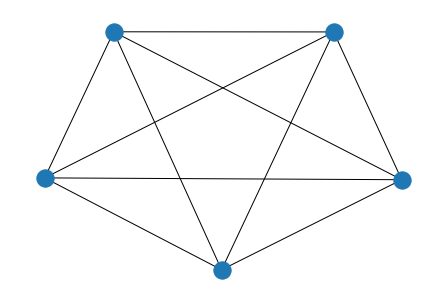

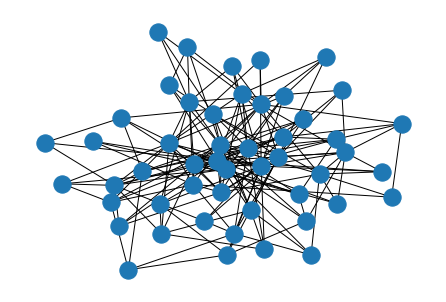

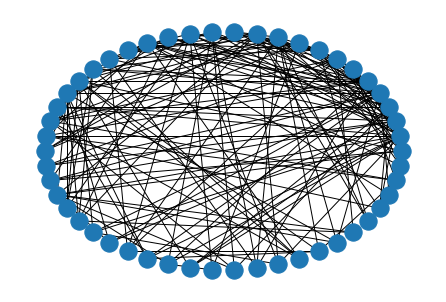

In [254]:
NODES = 50
START_SIZE = 5 
EDGES = 3
INIT = 'fc' # fully connected
## instantiate the model 
BA = BarabasiAlbert(NODES, EDGES, START_SIZE, INIT)
## get the initial graph 
G = BA.graph ## returns dictionary
## we can also get the networkx one 
Gn = BA._to_networkx(G) ## returns networkX 
nx.draw(Gn)
plt.show()
## run the matrix BA algorithm 
GM = BA._matrix_BA()
## to network 
GMn = BA._to_networkx(GM)
nx.draw(GMn)
plt.show()
## in a ciruclar layout 
pos = nx.circular_layout(GMn)
nx.draw(GMn, pos=pos);plt.show()